# Python 常用库记录

## 一、matplotlib 实用绘图函数

In [4]:
%matplotlib inline

# 输出 svg，更清晰
%config InlineBackend.figure_format = 'svg'

from decimal import Decimal

import matplotlib.pyplot as plt
import numpy as np


PI2 = 2 * np.pi

### 1. 坐标轴经过原点

In [2]:
def set_ticks_pass_zero(axes):
    # 隐藏掉右边和上边的坐标轴
    # 这里 spine 是脊柱的意思，代指坐标轴（Spines，一条线段上有一系列的凸起，是不是很像脊柱骨啊~）
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    
    # 将 bottom/left 的 spines 设为 x/y 坐标轴
    axes.xaxis.set_ticks_position('bottom')
    axes.yaxis.set_ticks_position('left')
    
    # 使 spines 都经过原点
    axes.spines['bottom'].set_position('zero')  # 即 y 的 data 为 0 的位置
    axes.spines['left'].set_position('zero')

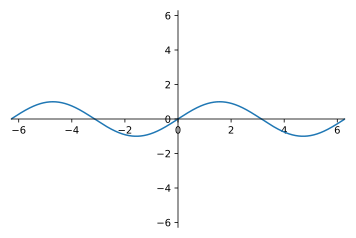

In [3]:
fig, ax = plt.subplots(dpi=120)

set_ticks_pass_zero(ax)

ax.set_xlim(-PI2, PI2)
ax.set_ylim(-PI2, PI2)

# set_axis_pi(ax, Decimal('2'), Decimal('0.5'))

x = np.arange(-PI2, PI2, 0.01)
y = np.sin(x)
ax.plot(x,y)

### 2. 坐标用 pi 标注

In [4]:
def _range_decimal(start: Decimal, stop: Decimal, step: Decimal):
    if start >= stop:
        raise RuntimeError("start >= stop can't be true!")

    res = []
    num = start
    while num < stop:
        res.append(num)
        num += step
    
    return res[1:]  # 返回一个全开区间，即不包括 start 和 stop 的区间


def _get_label(n: Decimal):
    a, b = n.as_integer_ratio()
    
    if b == 1:  # 分母为 1，即为整数
        if n == Decimal('0'):
            return '0'
        elif abs(n) == Decimal('1'):  # n 为 1
            return r'$\pi$' if n >= 0 else r'$-\pi$'
        else:
            return rf'${a} \pi$'
    else: # 为分数
        return r'$\frac{'+ str(a) + '}{' + str(b) + '} \pi$'

    
def set_axis_pi(axes, n: Decimal, step: Decimal):
    """
    x/y 坐标轴的 limit 为 -n*pi 到 n*pi
    tick 的间隔为 step*pi
    """
    n_pi = float(n) * np.pi
    
    # 设置坐标轴的 limit
    axes.set_xlim(-n_pi, n_pi)
    axes.set_ylim(-n_pi, n_pi)
    
    # 设置 ticks
    ticks_without_pi = _range_decimal(-n, Decimal('0'), step) + _range_decimal(Decimal('0'), n , step)  # 这个是 pi 的系数 range
    ticks = [float(it)*np.pi for it in ticks_without_pi]  # 乘上pi
    
    labels = list(map(_get_label, ticks_without_pi))  # 标签
    
    # 设置 x/y 轴的坐标
    axes.set_xticks(ticks)
    axes.set_xticklabels(labels)
    axes.set_yticks(ticks)
    axes.set_yticklabels(labels)
    

## 二、pandas 常见用法

In [ ]:
import pandas as pd

# 读取 csv，得到一个 DataFrame 对象
## 使用第一行作为 csv 列名
df = pd.read_csv("xxx.csv", header=0)
# csv 不包含列名，直接自动生成数字 0123 作为列名
df = pd.read_csv("xxx.csv", header=None)
## csv 不包含列名，手动设定列名
df = pd.read_csv("xxx.csv", names=['col1', 'col2', 'col3'])
# 尤其注意对 NULL 值的处理，这里自行设定要转换为 NULL 的值
df = pd.read_csv("xxx.csv", header=None, na_vaules=['NA', 'null', '', 'NAN'])

# 使用 python 中的数据构造 DataFrame 对象
## 方法一：使用字典，key 为列名，value 为列数据
df = pd.DataFrame({
    "col1": [1, 2, 3, 4],
    "col2": [2, 3, 4, 5],
    "col3": [3, 4, 5, 6],
})
## 方法二：使用两个列表
df = pd.DataFrame([
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6],
    ],
    names=['col1', 'col2', 'col3'],  # 或者直接省略 names，使用数字列名
)

# 导出 csv 文件，去掉索引，保留列名(header)
df.to_csv("xxx.csv", header=True, index=False)

# 查看表格的前五行
df.head()

# 列索引
df['col1']
df[['col1', ['col2']]]
## 当列名为有效的 Python 变量名称时，可以直接使用如下语法
df.col1
df.col2


# 使用 index labels 来索引表格的行（labels 可以为 str）
df.loc[1]  # 返回一个 Series 对象
df.loc[[1,2,3]]  # 多行索引，返回 DataFrame

# 完全基于整数的行索引
df.iloc[1]  # 返回一个 Series 对象
df.iloc[[2, 3]]  # 多列索引，返回 DataFrame

# 行索引
df[:100] # 前 100 行
df[df['col2'] > 1]  # 所有 df['col2'] 大于 1 的行
df[(df['col2'] > 1) & (df['col1'].strip().len() > 0)]  # 多个索引条件分别使用括号包裹，并使用 & | 符号做逐元素的布尔运算

# 转置此表格
df.T

# 排序
## axis=0 表示按行排序，这也是默认行为
df.sort_values(['col1', 'col2'], axis=0, ascending=True)  # 先使用 col1 排序，col1 不能确定的再按 col2 排序
## axis=1 或者 axis='columns' 表示按列排序

## 遍历 DataFrame 的所有行时，可以使用 df.iterrows() df.iteritems()，但是不推荐使用（因为性能不佳）
df.apply(lambda it: it, axix=0)  # 按列应用函数
df.apply(lambda it: it, axix=2)  # 按行应用函数
df.applymap(lambda it: it)  # 逐元素应用函数

# 修改 DataFrame 的 index 或者 column names
df.rename(columns=['c1', 'c2', 'c3'])

# 使用 groupby 进行分组，对 col3 这一列进行分组求和（感觉和 SQL 有点像）
df.groupby(['col1', 'col2'])['col3'].sum()

# 使用 join 横向拼接 DataFrame
df.join(df2)

# 使用 merge 按某一列的值进行横向拼接，类似 SQL 的 JOIN ON
df.merge(df2, left_on='key', how='inner')  # df 和 df2 都需要有 key 这一列

# 合并两个 DataFrame，上下拼接
pd.concat([df1, df2])
